## Author: Meiteng

In [ ]:
Using Muhammad's normalised variables

### SVI-based Variables & Indices (Boston)

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
from functools import reduce

import datetime as dt
import math
import plotly.express as px

**Note:** Zipcode-level data has been uploaded to 
/work/COVIDRedlining/data/ACS/acs_zip_codes_2018_5yr.csv

In [ ]:
# df_zip = pd.read_csv('/work/COVIDRedlining/data/ACS/acs_zip_codes_2018_5yr.csv')
# df_zip['geo_id'].nunique()

In [ ]:
# Read ACS data
# df_1 = pd.read_csv('/work/COVIDRedlining/data/ACS/ACS Census Tract 2018 (5 years).csv')

# df_full = pd.read_csv('/work/COVIDRedlining/data/ACS/acs_cleaned_data.csv')

### 2021-6-21
df_full = pd.read_csv("/work/COVIDRedlining/data/ACS/acs_cleaned_data_w_city_name.csv")

df_full.head()

,GEOID,city_name,reweighted_redline_index,total_pop,households,median_age,median_income,income_per_capita,gini_index,housing_units,...,income_25000_34999_normalised,income_35000_59999_normalised,income_60000_99999_normalised,income_100000_199999_normalised,income_200000_or_more_normalised,million_dollar_housing_units_normalised,mortgaged_housing_units_normalised,owner_occupied_housing_units_normalised,employed_pop_normalised,unemployed_pop_normalised
0,4.811398e+10,dallas,3.10,20.0,5.0,13.8,NaN,NaN,NaN,5.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,4.811300e+10,dallas,2.09,2548.0,1755.0,41.0,95668.0,87771.0,0.4390,1976.0,...,0.037037,0.160684,0.291168,0.283761,0.160684,0.005567,0.316802,0.463563,0.958730,0.041270
2,4.811301e+10,dallas,1.00,2331.0,1098.0,38.5,102875.0,81534.0,0.5498,1138.0,...,0.035519,0.145719,0.181239,0.231330,0.271403,0.066784,0.304042,0.442004,0.957479,0.034928
3,4.811300e+10,dallas,2.16,3950.0,1557.0,32.8,55262.0,38126.0,0.5171,1755.0,...,0.089274,0.240206,0.131663,0.220938,0.099550,0.024501,0.254131,0.445584,0.959062,0.040938
4,4.811301e+10,dallas,3.00,5568.0,1996.0,43.1,28664.0,13681.0,0.4096,2120.0,...,0.129760,0.249499,0.146293,0.020040,0.000000,0.000000,0.228774,0.621698,0.926387,0.073613


In [ ]:
df_full.columns

Index(['GEOID', 'city_name', 'reweighted_redline_index', 'total_pop',
       'households', 'median_age', 'median_income', 'income_per_capita',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'owner_occupied_housing_units_lower_value_quartile',
       'owner_occupied_housing_units_median_value',
       'owner_occupied_housing_units_upper_value_quartile',
       'median_year_structure_built', 'median_rent',
       'percent_income_spent_on_rent', 'bachelors_degree_or_higher_25_64',
       'aged_65_or_older_normalised', 'aged_17_or_younger_normalised',
       'multi_unit_structures_normalised', 'poverty_normalised',
       'households_public_asst_or_food_stamps_normalised',
       'black_pop_normalised', 'asian_pop_normalised',
       'hispanic_pop_normalised', 'amerindian_pop_normalised',
       'white_pop_normalised', 'non_white_pop_normalised',
       'other_race_pop_normalised', 'male_pop_normalised',
       'female_pop

In [ ]:
for x in sorted(df_full.columns):
    print(x)

GEOID
aged_17_or_younger_normalised
aged_65_or_older_normalised
aggregate_travel_time_to_work_normalised
amerindian_pop_normalised
asian_pop_normalised
bachelors_degree_or_higher_25_64
black_pop_normalised
children_in_single_female_hh_normalised
children_normalised
city_name
commuters_by_bus_normalised
commuters_by_subway_or_elevated_normalised
commuters_personal_transport_normalised
education_bachelors_degree_normalised
education_graduate_degree_normalised
education_high_school_or_less_normalised
education_less_than_bachelors_normalised
employed_pop_normalised
family_households_normalised
female_pop_normalised
gini_index
group_quarters_normalised
hispanic_pop_normalised
households
households_public_asst_or_food_stamps_normalised
housing_built_1939_or_earlier_normalised
housing_built_2004_or_later_normalised
housing_units
housing_units_renter_occupied_normalised
income_100000_199999_normalised
income_15000_24999_normalised
income_200000_or_more_normalised
income_25000_34999_normalised


### Filter for Boston

In [ ]:
df = df_full[df_full['city_name'] == 'boston']

In [ ]:
df_redline = gpd.read_file('/work/COVIDRedlining/data/boston/boston_redlined_numerical_values.geojson')

In [ ]:
df_redline.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'reweighted_redline_index', 'ordinal_value', 'geometry'],
      dtype='object')

In [ ]:
df_redline['geometry'].head()

0    POLYGON ((-71.08560 42.34788, -71.08531 42.347...
1    POLYGON ((-71.10845 42.32239, -71.10798 42.322...
2    POLYGON ((-71.07921 42.34270, -71.07856 42.343...
3    POLYGON ((-71.13924 42.23366, -71.13841 42.234...
4    POLYGON ((-71.09208 42.30995, -71.09182 42.310...
Name: geometry, dtype: geometry

In [ ]:
df_redline = df_redline[['GEOID','reweighted_redline_index', 'ordinal_value','geometry']]

In [ ]:
df_redline.geometry = df_redline['geometry'].centroid

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
df_redline['longitude'] = df_redline['geometry'].x
df_redline['latitude'] = df_redline['geometry'].y

In [ ]:
# df_redline.rename(columns = {'GEOID':'geo_id'}, inplace=True)

In [ ]:
df_redline.columns

Index(['GEOID', 'reweighted_redline_index', 'ordinal_value', 'geometry',
       'longitude', 'latitude'],
      dtype='object')

In [ ]:
df.columns

Index(['GEOID', 'city_name', 'reweighted_redline_index', 'total_pop',
       'households', 'median_age', 'median_income', 'income_per_capita',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'owner_occupied_housing_units_lower_value_quartile',
       'owner_occupied_housing_units_median_value',
       'owner_occupied_housing_units_upper_value_quartile',
       'median_year_structure_built', 'median_rent',
       'percent_income_spent_on_rent', 'bachelors_degree_or_higher_25_64',
       'aged_65_or_older_normalised', 'aged_17_or_younger_normalised',
       'multi_unit_structures_normalised', 'poverty_normalised',
       'households_public_asst_or_food_stamps_normalised',
       'black_pop_normalised', 'asian_pop_normalised',
       'hispanic_pop_normalised', 'amerindian_pop_normalised',
       'white_pop_normalised', 'non_white_pop_normalised',
       'other_race_pop_normalised', 'male_pop_normalised',
       'female_pop

In [ ]:
df = pd.merge(df,
                 df_redline,
                 on='GEOID', 
                 how='left')

In [ ]:
df.columns.tolist()

['GEOID',
 'city_name',
 'reweighted_redline_index_x',
 'total_pop',
 'households',
 'median_age',
 'median_income',
 'income_per_capita',
 'gini_index',
 'housing_units',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'owner_occupied_housing_units_lower_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_upper_value_quartile',
 'median_year_structure_built',
 'median_rent',
 'percent_income_spent_on_rent',
 'bachelors_degree_or_higher_25_64',
 'aged_65_or_older_normalised',
 'aged_17_or_younger_normalised',
 'multi_unit_structures_normalised',
 'poverty_normalised',
 'households_public_asst_or_food_stamps_normalised',
 'black_pop_normalised',
 'asian_pop_normalised',
 'hispanic_pop_normalised',
 'amerindian_pop_normalised',
 'white_pop_normalised',
 'non_white_pop_normalised',
 'other_race_pop_normalised',
 'male_pop_normalised',
 'female_pop_normalised',
 'pop_currently_unmarried_normalised',
 'pop_now_married_normalised',
 

In [ ]:
# Create 4 new SVI variables from ACS variables 
df['aged_65_or_older'] = df['female_65_to_66'] + df['female_67_to_69'] + df['female_70_to_74'] + df['female_75_to_79'] + df['female_80_to_84'] + df['female_85_and_over'] + df['male_65_to_66'] + df['male_67_to_69'] + df['male_70_to_74'] + df['male_75_to_79'] + df['male_80_to_84'] + df['male_85_and_over']
df['aged_17_or_younger'] = df['female_under_5'] + df['female_5_to_9'] + df['female_10_to_14'] + df['female_15_to_17'] + df['male_under_5'] + df['male_5_to_9'] + df['male_10_to_14'] + df['male_15_to_17']
df['multi_unit_structures'] = df['dwellings_10_to_19_units'] + df['dwellings_20_to_49_units'] + df['dwellings_50_or_more_units']

# Non-white
df['non_white'] = df['total_pop'] - df['white_pop']

KeyError: 'female_65_to_66'

In [ ]:
def perc_bin(x):
    
    if x > 0 and x <= 0.1:
      val = 1
    elif x > 0.1 and x <= 0.2:
      val = 2
    elif x > 0.2 and x <= 0.3:
      val = 3
    elif x > 0.3 and x <= 0.4:
      val = 4
    elif x > 0.4 and x <= 0.5:
      val = 5
    elif x > 0.5 and x <= 0.6:
      val = 6
    elif x > 0.6 and x <= 0.7:
      val = 7
    elif x > 0.7 and x <= 0.8:
      val = 8
    elif x > 0.8 and x <= 0.9:
      val = 9
    elif x > 0.9 and x <= 1:
      val = 10
    else:
      val = 0

    return val

<AxesSubplot:>

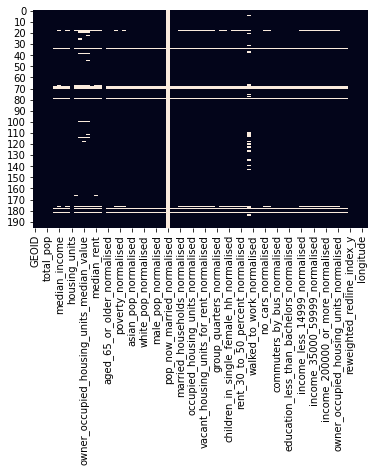

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Define a set variables selected based on SVI, for the purpose of data cleaning

SVI_Vars = ['reweighted_redline_index','longitude','latitude','poverty','unemployed_pop','median_income','income_per_capita','less_than_high_school_graduate',
'aged_65_or_older','aged_17_or_younger','one_parent_families_with_young_children',
'non_white',
'multi_unit_structures','mobile_homes','no_cars','group_quarters',
'pop_determined_poverty_status','total_pop','households','housing_units']

In [ ]:
# Remove duplicates and tracts with null values

df_Boston = df.copy() # Save a copy of the full Boston ACS dataset #Use copy to 
df = df_Boston[SVI_Vars]
df.head()

KeyError: "['unemployed_pop', 'non_white', 'reweighted_redline_index', 'multi_unit_structures', 'less_than_high_school_graduate', 'aged_17_or_younger', 'one_parent_families_with_young_children', 'aged_65_or_older', 'mobile_homes', 'pop_determined_poverty_status', 'group_quarters', 'poverty', 'no_cars'] not in index"

In [ ]:
# Remove duplicates and null values from the SVI-based variables dataset before further processing

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### Sample size = 168

In [ ]:
df.count()

GEOID                         0
city_name                     0
reweighted_redline_index_x    0
total_pop                     0
households                    0
                             ..
reweighted_redline_index_y    0
ordinal_value                 0
geometry                      0
longitude                     0
latitude                      0
Length: 83, dtype: int64

In [ ]:
# Aggregating variables and normalising them
# Setting flags for the tracts which are ranked at 90th percentile and above

df['poverty_perc'] = df['poverty']/df_Boston['pop_determined_poverty_status']
df['poverty_perc_bin'] = df['poverty_perc'].apply(perc_bin)
df.loc[df['poverty_perc'] >= df['poverty_perc'].quantile(0.9), 'poverty_flag'] = 1
df['poverty_flag'] = df['poverty_flag'].fillna(0)

df['unemployed_pop_perc'] = df['unemployed_pop'] / df['total_pop']
df['unemployed_pop_perc_bin'] = df['unemployed_pop_perc'].apply(perc_bin)
df.loc[df['unemployed_pop_perc'] >= df['unemployed_pop_perc'].quantile(0.9), 'unemployed_flag'] = 1
df['unemployed_flag'] = df['unemployed_flag'].fillna(0)

df['less_than_high_school_graduate_perc'] = df['less_than_high_school_graduate'] / df['total_pop']
df['less_than_high_school_graduate_perc_bin'] = df['less_than_high_school_graduate_perc'].apply(perc_bin)
df.loc[df['less_than_high_school_graduate_perc'] >= df['less_than_high_school_graduate_perc'].quantile(0.9), 'less_than_high_school_graduate_flag'] = 1
df['less_than_high_school_graduate_flag'] = df['less_than_high_school_graduate_flag'].fillna(0)

df['aged_65_or_older_perc'] = df['aged_65_or_older'] / df['total_pop']
df['aged_65_or_older_perc_bin'] = df['aged_65_or_older_perc'].apply(perc_bin)
df.loc[df['aged_65_or_older_perc'] >= df['aged_65_or_older_perc'].quantile(0.9), 'aged_65_or_older_flag'] = 1
df['aged_65_or_older_flag'] = df['aged_65_or_older_flag'].fillna(0)

df['aged_17_or_younger_perc'] = df['aged_17_or_younger'] / df['total_pop']
df['aged_17_or_younger_perc_bin'] = df['aged_17_or_younger_perc'].apply(perc_bin)
df.loc[df['aged_17_or_younger_perc'] >= df['aged_17_or_younger_perc'].quantile(0.9), 'aged_17_or_younger_flag'] = 1
df['aged_17_or_younger_flag'] = df['aged_17_or_younger_flag'].fillna(0)

df['one_parent_families_with_young_children_perc'] = df['one_parent_families_with_young_children'] / df['households']
df['one_parent_families_with_young_children_perc_bin'] = df['one_parent_families_with_young_children_perc'].apply(perc_bin)
df.loc[df['one_parent_families_with_young_children_perc'] >= df['one_parent_families_with_young_children_perc'].quantile(0.9), 'one_parent_families_with_young_children_flag'] = 1
df['one_parent_families_with_young_children_flag'] = df['one_parent_families_with_young_children_flag'].fillna(0)

df['non_white_perc'] = df['non_white'] / df['total_pop']
df['non_white_perc_bin'] = df['non_white_perc'].apply(perc_bin)
df.loc[df['non_white_perc'] >= df['non_white_perc'].quantile(0.9), 'non_white_flag'] = 1
df['non_white_flag'] = df['non_white_flag'].fillna(0)

df['multi_unit_structures_perc'] = df['multi_unit_structures'] / df['housing_units']
df['multi_unit_structures_perc_bin'] = df['multi_unit_structures_perc'].apply(perc_bin)
df.loc[df['multi_unit_structures_perc'] >= df['multi_unit_structures_perc'].quantile(0.9), 'multi_unit_structures_flag'] = 1
df['multi_unit_structures_flag'] = df['multi_unit_structures_flag'].fillna(0)

df['mobile_homes_perc'] = df['mobile_homes'] / df['housing_units']
df['mobile_homes_perc_bin'] = df['mobile_homes_perc'].apply(perc_bin)
df.loc[df['mobile_homes_perc'] >= df['mobile_homes_perc'].quantile(0.9), 'mobile_homes_flag'] = 1
df['mobile_homes_flag'] = df['mobile_homes_flag'].fillna(0)

df['no_cars_perc'] = df['no_cars'] / df['households']
df['no_cars_perc_bin'] = df['no_cars_perc'].apply(perc_bin)
df.loc[df['no_cars_perc'] >= df['no_cars_perc'].quantile(0.9), 'no_cars_flag'] = 1
df['no_cars_flag'] = df['no_cars_flag'].fillna(0)

df['group_quarters_perc'] = df['group_quarters'] / df['total_pop']
df['group_quarters_perc_bin'] = df['group_quarters_perc'].apply(perc_bin)
df.loc[df['group_quarters_perc'] >= df['group_quarters_perc'].quantile(0.9), 'group_quarters_flag'] = 1
df['group_quarters_flag'] = df['group_quarters_flag'].fillna(0)

KeyError: 'poverty'

In [ ]:
# Repeat flag setting for variables which do not requirea normalisation
# Setting flags for the tracts which are ranked at 90th percentile and above

df.loc[df['median_income'] <= df['median_income'].quantile(0.1), 'median_income_flag'] = 1
df['median_income_flag'] = df['median_income_flag'].fillna(0)

df.loc[df['income_per_capita'] <= df['income_per_capita'].quantile(0.1), 'income_per_capita_flag'] = 1
df['income_per_capita_flag'] = df['income_per_capita_flag'].fillna(0)

ValueError: cannot set a frame with no defined index and a scalar

### Create 5 New Features, i.e. a count of flags for all SVI-based variables, and for each of the 4 themes

In [ ]:
# The number of flags (for each tract), all SVI-based variables
df['SVI'] = df['poverty_flag'] + df['unemployed_flag'] + df['median_income_flag'] + df['income_per_capita_flag'] + df['less_than_high_school_graduate_flag'] + df['aged_65_or_older_flag'] + df['aged_17_or_younger_flag'] + df['one_parent_families_with_young_children_flag'] + df['non_white_flag'] + df['multi_unit_structures_flag'] + df['mobile_homes_flag'] + df['no_cars_flag'] + df['group_quarters_flag']

# The number of flags (for each tract); Theme#1: Socioeconomic Status
df['SVI_1'] = df['poverty_flag'] + df['unemployed_flag'] + df['median_income_flag'] + df['income_per_capita_flag'] + df['less_than_high_school_graduate_flag']

# The number of flags (for each tract); Theme#2: Household Composition & Disability
df['SVI_2'] = df['aged_65_or_older_flag'] + df['aged_17_or_younger_flag'] + df['one_parent_families_with_young_children_flag']

# The number of flags (for each tract); Theme#3: Minority Status & Language
df['SVI_3'] = df['non_white_flag']

# The number of flags (for each tract); Theme#4: Housing Type & Transportation
df['SVI_4'] = df['multi_unit_structures_flag'] + df['mobile_homes_flag'] + df['no_cars_flag'] + df['group_quarters_flag']

KeyError: 'poverty_flag'

### Create new dataframes for the following analyses:
(a) 1 for Redline Index and All SVI-based ACS variables and
(b) 1 for Redline Index and 4 groups of ACS variables, i.e. Themes 1~4

In [ ]:
#Preserve Boston Geodataframe
gdf_Boston = df_Boston.copy()
gdf_Boston.head()

,GEOID,city_name,reweighted_redline_index_x,total_pop,households,median_age,median_income,income_per_capita,gini_index,housing_units,...,million_dollar_housing_units_normalised,mortgaged_housing_units_normalised,owner_occupied_housing_units_normalised,employed_pop_normalised,unemployed_pop_normalised,reweighted_redline_index_y,ordinal_value,geometry,longitude,latitude
0,2.502501e+10,boston,3.90,3145.0,2008.0,40.8,93214.0,125222.0,0.6152,2693.0,...,0.015967,0.059042,0.113257,0.975104,0.024896,3.904488,4,POINT (-71.07937 42.34764),-71.079374,42.347642
1,2.502512e+10,boston,3.73,2817.0,1024.0,31.8,81250.0,39658.0,0.4873,1056.0,...,0.006629,0.229167,0.276515,0.920808,0.079192,3.725805,4,POINT (-71.10420 42.32066),-71.104202,42.320659
2,2.502507e+10,boston,4.00,2559.0,1177.0,35.4,154659.0,122822.0,0.4939,1241.0,...,0.054795,0.438356,0.646253,0.982951,0.017049,4.000000,4,POINT (-71.07539 42.34326),-71.075389,42.343258
3,2.502514e+10,boston,3.00,2475.0,929.0,40.3,71125.0,33013.0,0.3703,995.0,...,0.000000,0.313568,0.400000,0.980289,0.019711,3.000000,3,POINT (-71.12992 42.23709),-71.129917,42.237093
4,2.502508e+10,boston,3.00,5750.0,2298.0,31.3,20386.0,20995.0,0.6056,2377.0,...,0.000000,0.101388,0.116533,0.890363,0.109637,3.000000,3,POINT (-71.08723 42.30945),-71.087229,42.309448


#### Redline Index and All SVI-based ACS variables

In [ ]:
df_Boston = df # Preserve the original dataset as df_Boston
df = df_Boston[['reweighted_redline_index','longitude','latitude','poverty_perc_bin','unemployed_pop_perc_bin','median_income', 'income_per_capita','less_than_high_school_graduate_perc_bin','aged_65_or_older_perc_bin','aged_17_or_younger_perc_bin','one_parent_families_with_young_children_perc_bin','non_white_perc_bin','multi_unit_structures_perc_bin','mobile_homes_perc_bin','no_cars_perc_bin','group_quarters_perc_bin','SVI','SVI_1','SVI_2','SVI_3','SVI_4']]
df_corr = df_Boston[['reweighted_redline_index','poverty_perc','unemployed_pop_perc','median_income', 'income_per_capita','less_than_high_school_graduate_perc','aged_65_or_older_perc','aged_17_or_younger_perc','one_parent_families_with_young_children_perc','non_white_perc','multi_unit_structures_perc','mobile_homes_perc','no_cars_perc','group_quarters_perc','SVI','SVI_1','SVI_2','SVI_3','SVI_4']]

KeyError: "['mobile_homes_perc_bin', 'reweighted_redline_index', 'aged_65_or_older_perc_bin', 'poverty_perc_bin', 'group_quarters_perc_bin', 'unemployed_pop_perc_bin', 'SVI_3', 'SVI_4', 'no_cars_perc_bin', 'less_than_high_school_graduate_perc_bin', 'SVI', 'SVI_1', 'aged_17_or_younger_perc_bin', 'one_parent_families_with_young_children_perc_bin', 'non_white_perc_bin', 'multi_unit_structures_perc_bin', 'SVI_2'] not in index"

#### Subgrouping: Redline Index and 4 Themes of SVI-based variables

In [ ]:
# Redlining and ses - ACS variables selected based on Socioeconomic Status
df_ses = df_Boston[['reweighted_redline_index','poverty_perc_bin','unemployed_pop_perc_bin','median_income', 'income_per_capita','less_than_high_school_graduate_perc_bin']]

# Redlining and household composition - ACS variables selected based on SVI Household Composition & Disability
df_hh_composition_disability = df_Boston[['reweighted_redline_index','aged_65_or_older_perc_bin','aged_17_or_younger_perc_bin','one_parent_families_with_young_children_perc_bin']]

# Redlining and percentage of non-white population - ACS variables selected based on SVI Minority Status & Language
df_minority_status = df_Boston[['reweighted_redline_index','non_white_perc_bin']]

# Redlining and housing and transport - ACS variables selected based on SVI Housing Type & Transportation
df_housing_transport = df_Boston[['reweighted_redline_index','multi_unit_structures_perc_bin','mobile_homes_perc_bin','no_cars_perc_bin','group_quarters_perc_bin']]

KeyError: "['poverty_perc_bin', 'less_than_high_school_graduate_perc_bin', 'unemployed_pop_perc_bin', 'reweighted_redline_index'] not in index"

### Summary Statistics

For the full Boston dataset

In [ ]:
df.describe()

,GEOID,reweighted_redline_index_x,total_pop,households,median_age,median_income,income_per_capita,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,...,income_200000_or_more_normalised,million_dollar_housing_units_normalised,mortgaged_housing_units_normalised,owner_occupied_housing_units_normalised,employed_pop_normalised,unemployed_pop_normalised,reweighted_redline_index_y,ordinal_value,longitude,latitude
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation between SVI Variables (All)

Sample size = 168

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.astype(float).corr(method='spearman'), linewidth=0.1, linecolor='grey', vmin=-1.0, vmax=1.0, square=True, cmap='coolwarm', annot=True)

NameError: name 'df_corr' is not defined

<Figure size 864x720 with 0 Axes>

### Create two dataframes for analyses on (a) Redline vs 5 SVI-based indices; and (b) Minority vs 5 SVI-based indices

In [ ]:
df_redline_SVI = df[['reweighted_redline_index','longitude','latitude','SVI', 'SVI_1', 'SVI_2', 'SVI_3', 'SVI_4']]
df_minority_SVI = df[['non_white_perc_bin','SVI', 'SVI_1', 'SVI_2', 'SVI_3', 'SVI_4']]

KeyError: "['reweighted_redline_index', 'SVI_4', 'SVI_3', 'SVI', 'SVI_1', 'SVI_2'] not in index"

#### New Chart

In [ ]:
# df_redline_SVI_plot_no_zero = df_redline_SVI_plot[((df_redline_SVI_plot.SVI != 0) & (df_redline_SVI_plot.SVI_1 != 0) & (df_redline_SVI_plot.SVI_2 != 0) & (df_redline_SVI_plot.SVI_3 != 0) & (df_redline_SVI_plot.SVI_4 != 0))]


In [ ]:
df_redline_SVI_plot = df[['reweighted_redline_index','non_white_perc_bin','longitude','latitude','SVI', 'SVI_1', 'SVI_2', 'SVI_3', 'SVI_4']]

df_redline_SVI_plot.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=df_redline_SVI_plot["reweighted_redline_index"]*100, label="SVI Theme 3 - Minority Status at 90th-percentile", figsize=(10,7),
    c="SVI_3", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# save_fig("Redline_SVI")

KeyError: "['reweighted_redline_index', 'SVI_4', 'SVI_3', 'SVI', 'SVI_1', 'SVI_2', 'non_white_perc_bin'] not in index"

In [ ]:
sns.violinplot(x="non_white_perc_bin", y="SVI", data=df_redline_SVI_plot,palette='rainbow')

NameError: name 'df_redline_SVI_plot' is not defined

In [ ]:
sns.swarmplot(x="non_white_perc_bin", y="SVI", data=df_redline_SVI_plot)

NameError: name 'df_redline_SVI_plot' is not defined

#### Correlation Coefficients (All)

Correlation for Redline vs 5 SVI-based Indices

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_redline_SVI.astype(float).corr(method='spearman'), linewidth=0.1, linecolor='grey', vmin=-1.0, vmax=1.0, square=True, cmap='coolwarm', annot=True)


NameError: name 'df_redline_SVI' is not defined

<Figure size 864x720 with 0 Axes>

Correlation for Minority vs 5 SVI-based indices

In [ ]:
df_minority_SVI = df[['non_white_perc_bin','SVI', 'SVI_1', 'SVI_2', 'SVI_3', 'SVI_4']]

KeyError: "None of [Index(['non_white_perc_bin', 'SVI', 'SVI_1', 'SVI_2', 'SVI_3', 'SVI_4'], dtype='object')] are in the [columns]"

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_minority_SVI.astype(float).corr(method='spearman'), linewidth=0.1, linecolor='grey', vmin=-1.0, vmax=1.0, square=True, cmap='coolwarm', annot=True)

NameError: name 'df_minority_SVI' is not defined

<Figure size 864x720 with 0 Axes>

#### Correlation Coefficients, where p-value < 0.05

Sample size = 168

In [ ]:
# Define functions to (i) get p-values (to be used to mask out corr coef w p-values >= 0.05); (ii) plot the heat map to show only significant corr coef

from scipy import stats

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=0.1, linecolor='grey',square=True, cbar_kws={'orientation': 'vertical'})

##### Correlation (All)

In [ ]:
df_corr.dropna(inplace=True) # Remove missing values, if any

p_values = corr_sig(df_corr.astype(float))  # Convert integer to float before input
mask = np.invert(p_values<0.05)

corr = df_corr.corr(method='spearman')                 # All correlation values between the selected variables
p_values = corr_sig(df_corr)          # p-values for correlation between the selected variables
mask = np.invert(np.tril(p_values<0.05))  # Masking out corr coef w p-values >= 0.05; showing only lower triangle for analysis, as upper triangle is a mirror of the lower

# mask = np.invert(p_values<0.05)         # Un-comment this line to see both triangles (full heat map) 

# Plotting
plot_cor_matrix(corr,mask)

NameError: name 'df_corr' is not defined

##### Correlation between Redline Index vs 5 SVI-based Indices

In [ ]:
df_redline_SVI.dropna(inplace=True) # Remove missing values, if any

p_values = corr_sig(df_redline_SVI.astype(float))  # Convert integer to float before input
mask = np.invert(p_values<0.05)

corr = df_redline_SVI.corr(method='spearman')                 # All correlation values between the selected variables
p_values = corr_sig(df_redline_SVI)          # p-values for correlation between the selected variables
mask = np.invert(np.tril(p_values<0.05))  # Masking out corr coef w p-values >= 0.05; showing only lower triangle for analysis, as upper triangle is a mirror of the lower

# mask = np.invert(p_values<0.05)         # Un-comment this line to see both triangles (full heat map) 

# Plotting
plot_cor_matrix(corr,mask)

NameError: name 'df_redline_SVI' is not defined

##### Correlation between Minority vs 5 SVI-based Indices

In [ ]:
df_minority_SVI.dropna(inplace=True) # Remove missing values, if any

p_values = corr_sig(df_minority_SVI.astype(float))  # Convert integer to float before input
mask = np.invert(p_values<0.05)

corr = df_minority_SVI.corr(method='spearman')                 # All correlation values between the selected variables
p_values = corr_sig(df_minority_SVI)          # p-values for correlation between the selected variables
mask = np.invert(np.tril(p_values<0.05))  # Masking out corr coef w p-values >= 0.05; showing only lower triangle for analysis, as upper triangle is a mirror of the lower

# mask = np.invert(p_values<0.05)         # Un-comment this line to see both triangles (full heat map) 

# Plotting
plot_cor_matrix(corr,mask)

NameError: name 'df_minority_SVI' is not defined

## Index-level Visuals

### Pair Plots for All SVI-based ACS Variables, as well as SVI-based Indices

Sample size = 168

In [ ]:
sns.pairplot(df, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')
plt.savefig("pair-plot-all-svig.svg")

KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Joint Plots for Redline Index vs 5 SVI-based Indices - SVI and SVI_1 ~ SVI_4

Sample size = 168

In [ ]:
sns.pairplot(df_redline_SVI, kind = 'scatter', diag_kind = 'hist', plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

In [ ]:
sns.pairplot(df_minority_SVI, kind = 'scatter', diag_kind = 'hist', plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

#### Redline Index vs SVI (all flags counted)

In [ ]:
# Use Jointplot to match up two distplots for bivariate data. Options: scatter, reg, resid, kde, hex

df1 = df_redline_SVI.dropna(subset=['reweighted_redline_index','SVI'])
sns.jointplot(x='SVI',y='reweighted_redline_index',data=df1,kind='reg')

#### Redline Index vs SVI_2 (Theme#1 flags: Socioeconomic Status)

In [ ]:
df1 = df_redline_SVI.dropna(subset=['reweighted_redline_index','SVI_1'])
sns.jointplot(x='SVI_1',y='reweighted_redline_index',data=df1,kind='reg')

#### Redline Index vs SVI_2 (Theme#2 flags: Household Composition & Disability)

In [ ]:
df1 = df_redline_SVI.dropna(subset=['reweighted_redline_index','SVI_2'])
sns.jointplot(x='SVI_2',y='reweighted_redline_index',data=df1,kind='reg')

#### Redline Index vs SVI_3 (Theme#3 flags: Minority Status & Language)

In [ ]:
df1 = df_redline_SVI.dropna(subset=['reweighted_redline_index','SVI_3'])
sns.jointplot(x='SVI_3',y='reweighted_redline_index',data=df1,kind='reg')

#### Redline Index vs SVI_4 (Housing Type & Transportation)

In [ ]:
df1 = df_redline_SVI.dropna(subset=['reweighted_redline_index','SVI_4'])
sns.jointplot(x='SVI_4',y='reweighted_redline_index',data=df1,kind='reg')

## Variable-level Visuals

#### Redline Index vs SVI Theme 1 (Socioeconomic Status) Variables

In [ ]:
sns.pairplot(df_ses, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

#### Redline Index vs SVI Theme 2 (Household Composition & Disability) Variables

In [ ]:
sns.pairplot(df_hh_composition_disability, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

#### Redline Index vs SVI Theme 3 (Minority Status) Variables

(Note: Language variables are not available - all-null for 'speak_spanish_at_home_low_english' variable)

In [ ]:
sns.pairplot(df_minority_status, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

#### Redline Index vs SVI Theme 4 (Housing Type & Transportation) Variables

In [ ]:
sns.pairplot(df_housing_transport, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

In [ ]:
# fig = px.box(df, x="reweighted_redline_index")
# fig.show()

### Joint Plots

##### (Note: To select more variables of interest)

In [ ]:
# To-dos:
### [Akash] 5 SVIs vs rental prioritisation
### [Muhammad] 5 SVIs vs sdoh

### 5 SVI-based Indices vs Minority (i.e. Non-White percentage, binned)

#### SVI (All Flags) vs Minority

In [ ]:
df1 = df.dropna(subset=['SVI','non_white_perc_bin'])
sns.jointplot(x='non_white_perc_bin',y='SVI',data=df1,kind='reg')

#### SVI_1 (Theme#1 SES flags) vs Minority

In [ ]:
df1 = df.dropna(subset=['SVI_1','non_white_perc_bin'])
sns.jointplot(x='non_white_perc_bin',y='SVI_1',data=df1,kind='reg')

#### SVI_2 (Theme#2 Household Composition flags)vs Minority

In [ ]:
df1 = df.dropna(subset=['SVI_2','non_white_perc_bin'])
sns.jointplot(x='non_white_perc_bin',y='SVI_2',data=df1,kind='reg')

#### SVI_3 (Theme#3 Minority flags) vs Minority

(Note: This is passed - Minority flags are derived from non-white percentage.)

#### SVI_4 (Theme#4 Housing flags) vs Minority

In [ ]:
df1 = df.dropna(subset=['SVI_4','non_white_perc_bin'])
sns.jointplot(x='non_white_perc_bin',y='SVI_4',data=df1,kind='reg')

### Redline vs Minority (i.e. Non-White percentage, binned)

In [ ]:
df1 = df.dropna(subset=['reweighted_redline_index','non_white_perc_bin'])
sns.jointplot(x='non_white_perc_bin',y='reweighted_redline_index',data=df1,kind='reg')

## Spatial Correlations/Relationships between SVI variables and Redlining Index

In [ ]:
#Main dataset
gdf_Boston.head()

In [ ]:
#Recreating SVI variables for this dataset
SVI_Vars = ['geo_id','poverty','unemployed_pop','median_income','income_per_capita','less_than_high_school_graduate',
'aged_65_or_older','aged_17_or_younger','one_parent_families_with_young_children',
'non_white','multi_unit_structures','mobile_homes','no_cars','group_quarters',
'pop_determined_poverty_status','total_pop','households','housing_units', 'reweighted_redline_index','ordinal_value']

In [ ]:
#Subsetting SVI variables
gdf_Boston = gdf_Boston[SVI_Vars]
gdf_Boston.head()

In [ ]:
# Remove duplicates and null values from the SVI-based variables dataset before further processing
gdf_Boston.drop_duplicates(inplace=True)
gdf_Boston.dropna(inplace=True)

In [ ]:
# Aggregating variables and normalising them
# Setting flags for the tracts which are ranked at 90th percentile and above

gdf_Boston['poverty_perc'] = gdf_Boston['poverty']/gdf_Boston['pop_determined_poverty_status']
gdf_Boston['poverty_perc_bin'] = gdf_Boston['poverty_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['poverty_perc'] >= gdf_Boston['poverty_perc'].quantile(0.9), 'poverty_flag'] = 1
gdf_Boston['poverty_flag'] = gdf_Boston['poverty_flag'].fillna(0)

gdf_Boston['unemployed_pop_perc'] = gdf_Boston['unemployed_pop'] / gdf_Boston['total_pop']
gdf_Boston['unemployed_pop_perc_bin'] = gdf_Boston['unemployed_pop_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['unemployed_pop_perc'] >= gdf_Boston['unemployed_pop_perc'].quantile(0.9), 'unemployed_flag'] = 1
gdf_Boston['unemployed_flag'] = gdf_Boston['unemployed_flag'].fillna(0)

gdf_Boston['less_than_high_school_graduate_perc'] = gdf_Boston['less_than_high_school_graduate'] / gdf_Boston['total_pop']
gdf_Boston['less_than_high_school_graduate_perc_bin'] = gdf_Boston['less_than_high_school_graduate_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['less_than_high_school_graduate_perc'] >= gdf_Boston['less_than_high_school_graduate_perc'].quantile(0.9), 'less_than_high_school_graduate_flag'] = 1
gdf_Boston['less_than_high_school_graduate_flag'] = gdf_Boston['less_than_high_school_graduate_flag'].fillna(0)

gdf_Boston['aged_65_or_older_perc'] = gdf_Boston['aged_65_or_older'] / gdf_Boston['total_pop']
gdf_Boston['aged_65_or_older_perc_bin'] = gdf_Boston['aged_65_or_older_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['aged_65_or_older_perc'] >= gdf_Boston['aged_65_or_older_perc'].quantile(0.9), 'aged_65_or_older_flag'] = 1
gdf_Boston['aged_65_or_older_flag'] = gdf_Boston['aged_65_or_older_flag'].fillna(0)

gdf_Boston['aged_17_or_younger_perc'] = gdf_Boston['aged_17_or_younger'] / gdf_Boston['total_pop']
gdf_Boston['aged_17_or_younger_perc_bin'] = gdf_Boston['aged_17_or_younger_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['aged_17_or_younger_perc'] >= gdf_Boston['aged_17_or_younger_perc'].quantile(0.9), 'aged_17_or_younger_flag'] = 1
gdf_Boston['aged_17_or_younger_flag'] = gdf_Boston['aged_17_or_younger_flag'].fillna(0)

gdf_Boston['one_parent_families_with_young_children_perc'] = gdf_Boston['one_parent_families_with_young_children'] / gdf_Boston['households']
gdf_Boston['one_parent_families_with_young_children_perc_bin'] = gdf_Boston['one_parent_families_with_young_children_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['one_parent_families_with_young_children_perc'] >= gdf_Boston['one_parent_families_with_young_children_perc'].quantile(0.9), 'one_parent_families_with_young_children_flag'] = 1
gdf_Boston['one_parent_families_with_young_children_flag'] = gdf_Boston['one_parent_families_with_young_children_flag'].fillna(0)

gdf_Boston['non_white_perc'] = gdf_Boston['non_white'] / gdf_Boston['total_pop']
gdf_Boston['non_white_perc_bin'] = gdf_Boston['non_white_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['non_white_perc'] >= gdf_Boston['non_white_perc'].quantile(0.9), 'non_white_flag'] = 1
gdf_Boston['non_white_flag'] = gdf_Boston['non_white_flag'].fillna(0)

gdf_Boston['multi_unit_structures_perc'] = gdf_Boston['multi_unit_structures'] / gdf_Boston['housing_units']
gdf_Boston['multi_unit_structures_perc_bin'] = gdf_Boston['multi_unit_structures_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['multi_unit_structures_perc'] >= gdf_Boston['multi_unit_structures_perc'].quantile(0.9), 'multi_unit_structures_flag'] = 1
gdf_Boston['multi_unit_structures_flag'] = gdf_Boston['multi_unit_structures_flag'].fillna(0)

gdf_Boston['mobile_homes_perc'] = gdf_Boston['mobile_homes'] / gdf_Boston['housing_units']
gdf_Boston['mobile_homes_perc_bin'] = gdf_Boston['mobile_homes_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['mobile_homes_perc'] >= gdf_Boston['mobile_homes_perc'].quantile(0.9), 'mobile_homes_flag'] = 1
gdf_Boston['mobile_homes_flag'] = gdf_Boston['mobile_homes_flag'].fillna(0)

gdf_Boston['no_cars_perc'] = gdf_Boston['no_cars'] / gdf_Boston['households']
gdf_Boston['no_cars_perc_bin'] = gdf_Boston['no_cars_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['no_cars_perc'] >= gdf_Boston['no_cars_perc'].quantile(0.9), 'no_cars_flag'] = 1
gdf_Boston['no_cars_flag'] = gdf_Boston['no_cars_flag'].fillna(0)

gdf_Boston['group_quarters_perc'] = gdf_Boston['group_quarters'] / gdf_Boston['total_pop']
gdf_Boston['group_quarters_perc_bin'] = gdf_Boston['group_quarters_perc'].apply(perc_bin)
gdf_Boston.loc[gdf_Boston['group_quarters_perc'] >= gdf_Boston['group_quarters_perc'].quantile(0.9), 'group_quarters_flag'] = 1
gdf_Boston['group_quarters_flag'] = gdf_Boston['group_quarters_flag'].fillna(0)

In [ ]:
# Repeat flag setting for variables which do not requirea normalisation
# Setting flags for the tracts which are ranked at 90th percentile and above

gdf_Boston.loc[gdf_Boston['median_income'] <= gdf_Boston['median_income'].quantile(0.1), 'median_income_flag'] = 1
gdf_Boston['median_income_flag'] = gdf_Boston['median_income_flag'].fillna(0)

gdf_Boston.loc[gdf_Boston['income_per_capita'] <= gdf_Boston['income_per_capita'].quantile(0.1), 'income_per_capita_flag'] = 1
gdf_Boston['income_per_capita_flag'] = gdf_Boston['income_per_capita_flag'].fillna(0)

In [ ]:
# The number of flags (for each tract), all SVI-based variables
gdf_Boston['SVI'] = gdf_Boston['poverty_flag'] + gdf_Boston['unemployed_flag'] + gdf_Boston['median_income_flag'] + gdf_Boston['income_per_capita_flag'] + gdf_Boston['less_than_high_school_graduate_flag'] + gdf_Boston['aged_65_or_older_flag'] + gdf_Boston['aged_17_or_younger_flag'] + gdf_Boston['one_parent_families_with_young_children_flag'] + gdf_Boston['non_white_flag'] + gdf_Boston['multi_unit_structures_flag'] + gdf_Boston['mobile_homes_flag'] + gdf_Boston['no_cars_flag'] + gdf_Boston['group_quarters_flag']

# The number of flags (for each tract); Theme#1: Socioeconomic Status
gdf_Boston['SVI_1'] = gdf_Boston['poverty_flag'] + gdf_Boston['unemployed_flag'] + gdf_Boston['median_income_flag'] + gdf_Boston['income_per_capita_flag'] + gdf_Boston['less_than_high_school_graduate_flag']

# The number of flags (for each tract); Theme#2: Household Composition & Disability
gdf_Boston['SVI_2'] = gdf_Boston['aged_65_or_older_flag'] + gdf_Boston['aged_17_or_younger_flag'] + gdf_Boston['one_parent_families_with_young_children_flag']

# The number of flags (for each tract); Theme#3: Minority Status & Language
gdf_Boston['SVI_3'] = gdf_Boston['non_white_flag']

# The number of flags (for each tract); Theme#4: Housing Type & Transportation
gdf_Boston['SVI_4'] = gdf_Boston['multi_unit_structures_flag'] + gdf_Boston['mobile_homes_flag'] + gdf_Boston['no_cars_flag'] + gdf_Boston['group_quarters_flag']

In [ ]:
gdf_Boston.head()

In [ ]:
#Merging with geo file for spatial analysis

import geopandas as gpd
#Loading MASS geofile
boston_geodf = gpd.read_file('/work/COVIDRedlining/data/boston/boston census tracts/tl_2019_25_tract.shp')

#Taking only geo-values for boston
boston_geoid = list(df_redline['geo_id'])

#Renaming columns 
boston_geodf = boston_geodf.rename(columns={'GEOID':'geo_id'})

#Converting data types
boston_geodf['geo_id'] = boston_geodf['geo_id'].astype(float) 

#Subsetting only boston valyes
boston_geodf = boston_geodf.loc[boston_geodf['geo_id'].isin(boston_geoid)]

#Merging SVI with geo df 
gdf_Boston = boston_geodf.merge(gdf_Boston, on ='geo_id', how ='left')
gdf_Boston.head()

In [ ]:
gdf_Boston.columns

## SVI + Redlining Index Correlation

In [ ]:
#Importing spatial libraries
import fiona.crs
from libpysal.weights.contiguity import Queen
from libpysal import examples
from libpysal import weights
import esda
from esda.moran import Moran, Moran_Local,Moran_BV, Moran_Local_BV
from splot.esda import lisa_cluster, plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation, moran_scatterplot

In [ ]:
x.shape

In [ ]:
#Creating spatial indices and running correlations

#Creating an empty df for storing the results of the correlation
spatial_corr = pd.DataFrame(columns=['SVI','SES','Household_Composition','Minority','Housing_Transportation'])

#Dropping null values
gdf_Boston = gdf_Boston.dropna()

#Renaming columns 
gdf_Boston = gdf_Boston.rename(columns={'ordinal_value':'redlining_index'})

#Getting all SVI columns
SVI_corr_vars = ['SVI','SVI_1','SVI_2','SVI_3','SVI_4']

#Spatial transformations
w = Queen.from_dataframe(gdf_Boston)
w.transform = 'R'

#Storing values of correlation in a list
corr_list = []
for i in SVI_corr_vars:
#Running spatial correlations
    y = gdf_Boston[i].values
    x = gdf_Boston['reweighted_redline_index'].values
    moran = Moran(y,w)
    moran_loc = Moran_Local(y, w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc_bv = Moran_Local_BV(y, x, w, permutations = 999)
    corr_list.append(moran_bv.I)
    plot_local_autocorrelation(moran_loc_bv, gdf_Boston, 'non_white', figsize=(15,15))
    #Adding a column for cluster values
    gdf_Boston['{}_cluster'.format(i)] = moran_loc_bv.q 
    plt.title('{} and Redlining'.format(i), fontdict={'fontsize':20})
    plt.show()


df_length = len(spatial_corr)
spatial_corr.loc[df_length] = corr_list

In [ ]:
spatial_corr.head()

In [ ]:
#Reassigning cluster values such that 1 = HH, 2 = HL, 3 = LH, 4 = LL
def cluster_assign(row):

    if row == 2:
        val = 3
    elif row == 3:
        val = 4
    elif row == 4:
        val = 2
    else:
        val = 1

    return val

In [ ]:
#Applying clusters

gdf_Boston['SVI'] = gdf_Boston['SVI'].apply(cluster_assign)
gdf_Boston['SVI_1_cluster'] = gdf_Boston['SVI_1_cluster'].apply(cluster_assign)
gdf_Boston['SVI_2_cluster'] = gdf_Boston['SVI_2_cluster'].apply(cluster_assign)
gdf_Boston['SVI_3_cluster'] = gdf_Boston['SVI_3_cluster'].apply(cluster_assign)
gdf_Boston['SVI_4_cluster'] = gdf_Boston['SVI_4_cluster'].apply(cluster_assign)

In [ ]:
gdf_Boston.head()

In [ ]:
ax = gdf_Boston.to_crs('EPSG:3857').plot(column='SVI',figsize=(15, 15), alpha=0.5, edgecolor='k', cmap = "coolwarm",legend=True)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('{} and Redlining'.format(i))
ax.set_axis_off()

In [ ]:
#1 = (HH), 2 = (HL), 3 = (LH), 4 = (LL) where HH = High SVI, High Redlining, LH = Low SVI, High Redline

import contextily as ctx

cluster_list = ['SVI_cluster','SVI_1_cluster','SVI_2_cluster','SVI_3_cluster','SVI_4_cluster']
for i in cluster_list:
    ax = gdf_Boston.to_crs('EPSG:3857').plot(column=i,figsize=(15, 15), alpha=0.5, edgecolor='k', cmap = "coolwarm_r",legend=True)
    ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_title('{} and Redlining'.format(i))
    ax.set_axis_off()

Moran's I validity for SVI

In [ ]:
import esda
Moran_SVI = esda.Moran_BV(gdf_Boston.SVI,gdf_Boston.redlining_index, w, permutations=1000)
print("Moran's I: {0:.{1}f}".format(Moran_SVI.I, 3))
print("Moran's E[I]: {0:.{1}f}".format(Moran_SVI.EI_sim, 3))
print("Moran's Var[I]: {0:.{1}f}".format(Moran_SVI.VI_sim, 3))

In [ ]:
round(Moran_SVI.p_z_sim, 3)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.kdeplot(Moran_SVI.sim, shade=True, ax=ax)
ax.axvline(Moran_SVI.I, 0, 10, color="r")
ax.set_title("SVI Moran's I")
ax.legend(["1000 random permutations", "observed \nempirical p.value: " + str(round(Moran_SVI.p_sim,3))])
ax.vlines(Moran_SVI.sim, 0, 0.5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c9a4f701-31a5-4164-b3f3-c09cddf1309e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>